In [30]:

import pandas as pd

db = pd.read_csv('./campaign2.csv', sep=';')
pd.set_option('display.max_columns', None)
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [31]:
# Checking NA values
db.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [32]:
# Dropping NA values
db = db.dropna()
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [33]:
# drop id
db = db.drop('ID', axis=1)
# Converting to datetime
db['Dt_Customer'] = pd.to_datetime(db['Dt_Customer'], format='%Y-%m-%d')

In [34]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-null   i

In [35]:
db_dummies = pd.get_dummies(db, columns=['Education', 'Marital_Status'])
db_dummies.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,False,False,True,False,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,False,False,False,False,True,False,False,False,True,False,False,False,False


In [36]:
db_dummies['Z_Revenue'].value_counts()

Z_Revenue
11    2216
Name: count, dtype: int64

In [37]:
# add column total purchases
db_dummies['TotalPurchases'] = db['NumDealsPurchases'] + db['NumWebPurchases'] + db['NumCatalogPurchases'] + db['NumStorePurchases']
db_dummies['TotalPurchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: TotalPurchases, dtype: int64

In [38]:
db_dummies.set_index('Dt_Customer', inplace=True)
db_dummies.sort_index(inplace=True)
db_dummies.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,TotalPurchases
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-07-30,1970,55158.0,1,1,72,293,0,87,4,11,23,4,7,2,5,7,0,0,0,0,0,0,3,11,1,False,False,False,False,True,False,False,False,True,False,False,False,False,18
2012-07-31,1950,52203.0,0,0,36,488,21,238,56,108,28,1,8,7,11,6,0,0,0,0,0,0,3,11,0,True,False,False,False,False,False,False,False,False,False,True,False,False,27
2012-08-01,1959,82576.0,0,0,66,1206,55,445,168,18,18,1,2,4,12,1,0,0,1,0,0,0,3,11,0,False,False,False,True,False,False,False,False,False,False,True,False,False,19
2012-08-01,1976,7500.0,1,0,19,7,0,12,13,7,32,5,4,1,2,9,1,0,0,0,0,0,3,11,1,False,False,True,False,False,False,False,False,True,False,False,False,False,12
2012-08-01,1957,73803.0,0,1,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,3,11,1,False,False,True,False,False,False,False,False,True,False,False,False,False,22


In [39]:
db_timeseries = db_dummies['TotalPurchases'].resample('D').sum()
db_timeseries.head()

Dt_Customer
2012-07-30     18
2012-07-31     27
2012-08-01     63
2012-08-02     40
2012-08-03    103
Freq: D, Name: TotalPurchases, dtype: int64

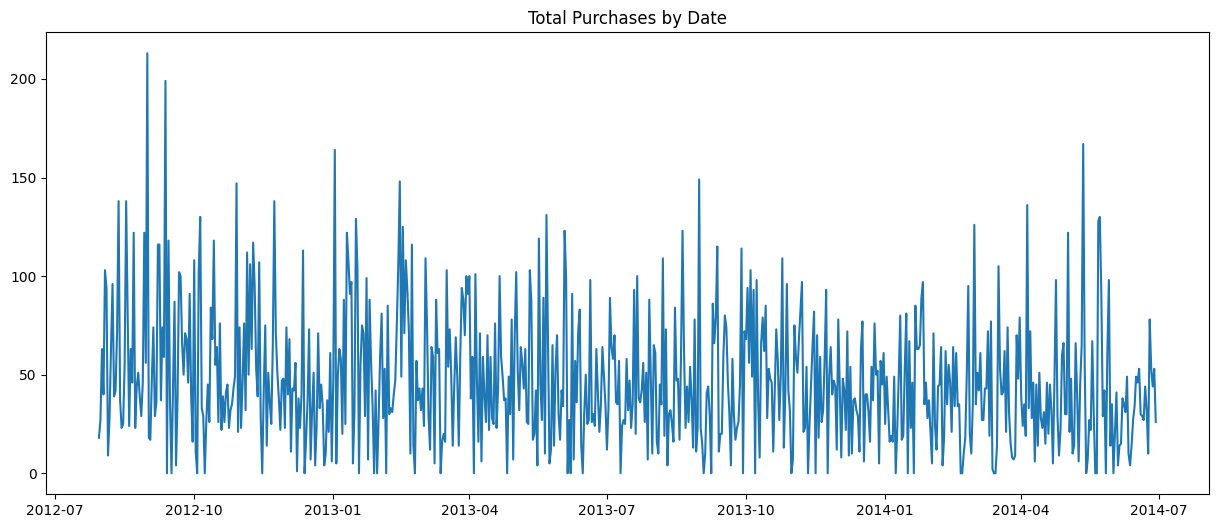

In [40]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(db_timeseries)
plt.title('Total Purchases by Date')
plt.show()

In [41]:
# Splitting data into train and test
train_size = int(len(db_timeseries) * 0.8)
train, test = db_timeseries.iloc[:train_size], db_timeseries.iloc[train_size:]

In [42]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -24.096944
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [46]:
# Auto arima model
from pmdarima import auto_arima
model = auto_arima(train, seasonal=True, m=7)

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  560
Model:             SARIMAX(5, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -2793.723
Date:                             Mon, 24 Feb 2025   AIC                           5605.445
Time:                                     20:56:37   BIC                           5644.381
Sample:                                 07-30-2012   HQIC                          5620.650
                                      - 02-09-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8710      0.040    -21.596      0.000      -0.950      -0.792
ar.L2         -0.7185      0.054    -13.383      0.000      -0.824      -0.613
ar.L3         -0.5372      0.058     -9.245      0.000      -0.651      -0.423
ar.L4         -0.3110      0.053     -5.825      0.000      -0.416      -0.206
ar.L5         -0.1683      0.046     -3.627      0.000      -0.259      -0.077
ar.S.L7        0.8210      0.078     10.581      0.000       0.669       0.973
ar.S.L14       0.1208      0.041      2.922      0.003       0.040       0.202
ma.S.L7       -0.9077      0.069    -13.166      0.000      -1.043      -0.773
sigma2      1277.9414     69.559     18.372      0.000    1141.608    1414.275
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                38.46
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

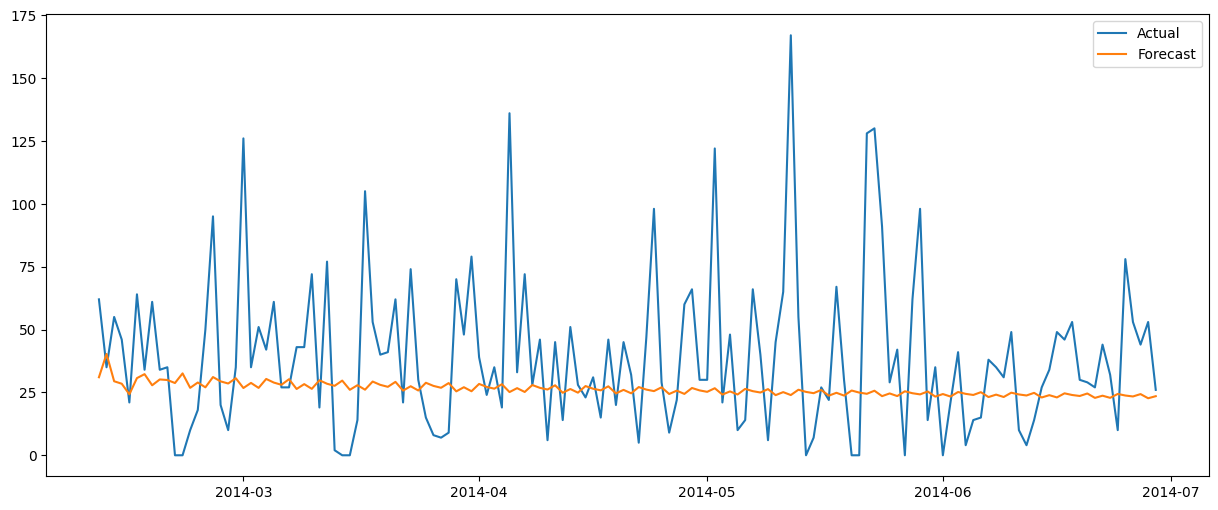

In [48]:
# Plot the forecast and the actual values
forecast = model.predict(n_periods=len(test))
plt.figure(figsize=(15, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [49]:
# evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 33.767
